Data shape: (64, 80, 33, 176)
Standard Deviation Data Shape with ADHD patient: (64, 80, 33)


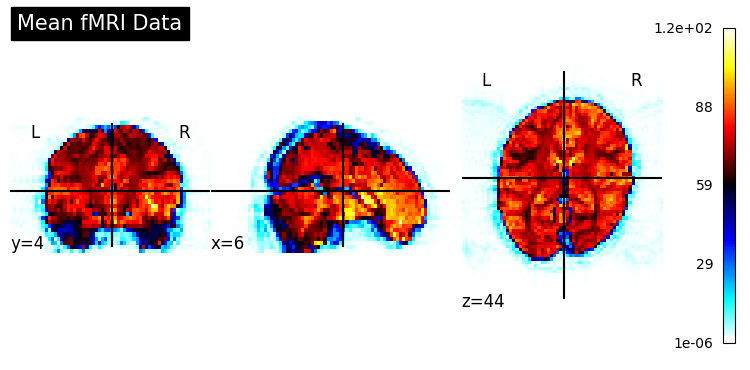

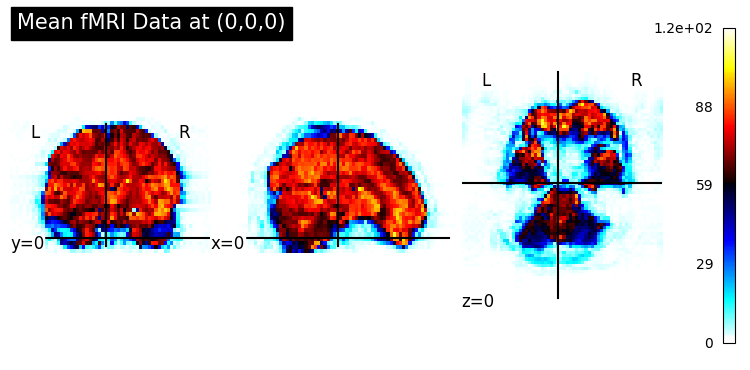

In [69]:
import nibabel as nib
import numpy as np
from nilearn import plotting, image

# Load the 4D fMRI data
nifti_file_path = r'F:\fmri-datasets\sub-0010001\ses-1\func\sub-0010001_ses-1_task-rest_run-1_bold.nii.gz'
img = nib.load(nifti_file_path)
data = img.get_fdata()  
img_load=image.load_img(nifti_file_path)
print("Data shape:", data.shape)  # Should be in the form (X, Y, Z, Time)
affine = img.affine     # Extract the affine transformation matrix
header = img.header     # Extract the header

img_mean=np.mean(data, axis=3)
img_load = nib.Nifti1Image(img_mean, affine=affine, header=header)
plotting.plot_stat_map(img_load, title="Mean fMRI Data", bg_img=None)
plotting.plot_stat_map(
    img_load,
    title="Mean fMRI Data at (0,0,0)",
    display_mode='ortho',  
    threshold=0,           
    cut_coords=(0, 0, 0),  
bg_img=None)

# Calculate the standard deviation across the time dimension (axis=3)
std_dev_data = np.std(data, axis=3)

# Output the shape and an example of the result
print("Standard Deviation Data Shape with ADHD patient:", std_dev_data.shape)


Data shape: (64, 80, 33, 176)
Standard Deviation Data Shape with non-ADHD patient: (64, 80, 33)


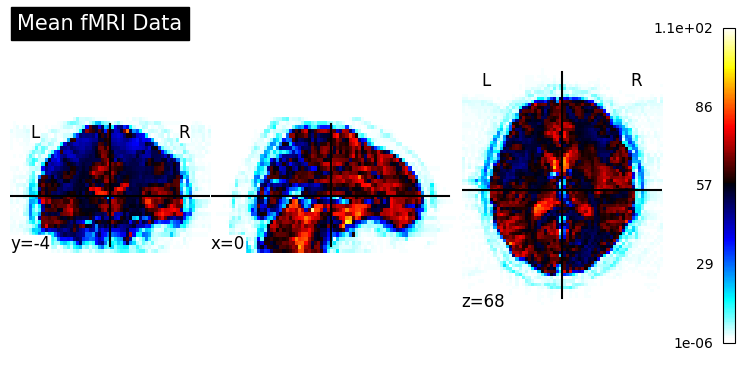

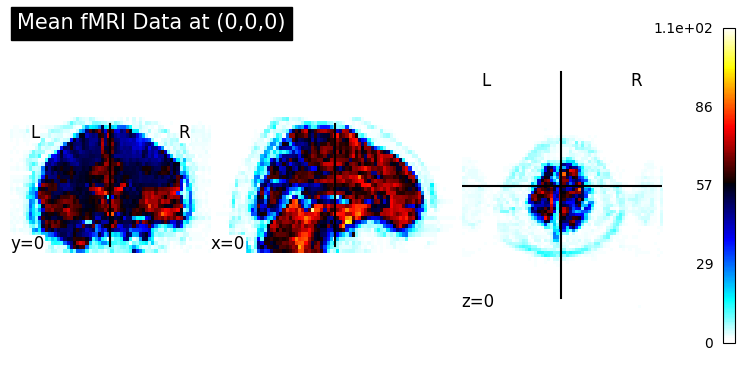

In [70]:
import nibabel as nib
import numpy as np

# Load the 4D fMRI data
nifti_file_path = r'F:\fmri-datasets\sub-0010114\ses-1\func\sub-0010114_ses-1_task-rest_run-1_bold.nii.gz'
img = nib.load(nifti_file_path)
data = img.get_fdata()  
img_load=image.load_img(nifti_file_path)
print("Data shape:", data.shape)  # Should be in the form (X, Y, Z, Time)
affine = img.affine     # Extract the affine transformation matrix
header = img.header     # Extract the header

img_mean=np.mean(data, axis=3)
img_load = nib.Nifti1Image(img_mean, affine=affine, header=header)
plotting.plot_stat_map(img_load, title="Mean fMRI Data", bg_img=None)
plotting.plot_stat_map(
    img_load,
    title="Mean fMRI Data at (0,0,0)",
    display_mode='ortho',  
    threshold=0,           
    cut_coords=(0, 0, 0),  
bg_img=None)

# Calculate the standard deviation across the time dimension (axis=3)
std_dev_data = np.std(data, axis=3)

# Output the shape and an example of the result
print("Standard Deviation Data Shape with non-ADHD patient:", std_dev_data.shape)

In [71]:
import nibabel as nib
import numpy as np
import csv

# File paths for ADHD and non-ADHD data
non_adhd_file_path = r'F:\fmri-datasets\sub-0010114\ses-1\func\sub-0010114_ses-1_task-rest_run-1_bold.nii.gz'
adhd_file_path = r'F:\fmri-datasets\sub-0010001\ses-1\func\sub-0010001_ses-1_task-rest_run-1_bold.nii.gz'

# Load ADHD data and calculate standard deviation
img_adhd = nib.load(adhd_file_path)
data_adhd = img_adhd.get_fdata()  # 4D numpy array
std_dev_data_adhd = np.std(data_adhd, axis=3)  

# Load Non-ADHD data and calculate standard deviation
img_non_adhd = nib.load(non_adhd_file_path)
data_non_adhd = img_non_adhd.get_fdata()  # 4D numpy array
std_dev_data_non_adhd = np.std(data_non_adhd, axis=3)  

# Verify that both datasets have the same shape
if std_dev_data_adhd.shape != std_dev_data_non_adhd.shape:
    raise ValueError("ADHD and non-ADHD data have different shapes, cannot compare.")

# Define the output CSV file
output_file = 'voxel_standard_deviation_comparison.csv'

# Write the standard deviations into a CSV
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["X", "Y", "Z", "ADHD Std Dev", "Non-ADHD Std Dev"])  # Header row
    
    # Iterate through each voxel
    for x in range(std_dev_data_adhd.shape[0]):
        for y in range(std_dev_data_adhd.shape[1]):
            for z in range(std_dev_data_adhd.shape[2]):
                adhd_std = std_dev_data_adhd[x, y, z]
                non_adhd_std = std_dev_data_non_adhd[x, y, z]
                writer.writerow([x, y, z, adhd_std, non_adhd_std])

print(f"Standard deviation data has been written to {output_file}")


Standard deviation data has been written to voxel_standard_deviation_comparison.csv


C:\Users\Bikesh\AppData\Local\Temp\ipykernel_17484\2608827866.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sd_diff_flattened, shade=True, color='green')


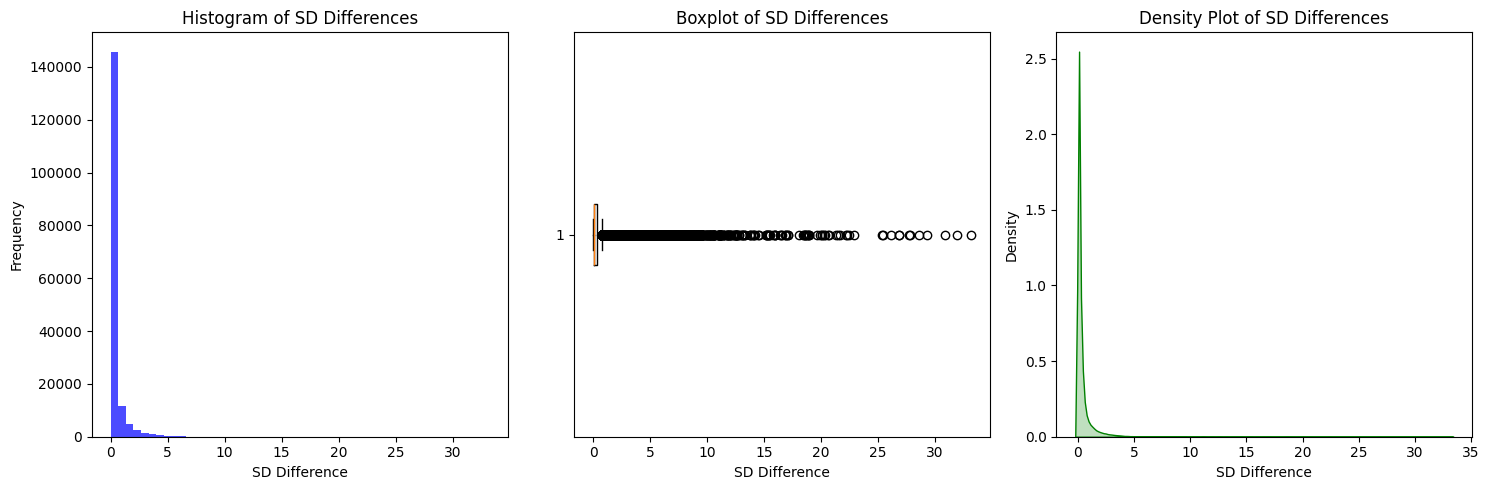

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


adhd_sd = std_dev_data_adhd 
non_adhd_sd = std_dev_data_non_adhd  

# Step 1: Calculate the absolute difference matrix
sd_diff_matrix = np.abs(adhd_sd - non_adhd_sd)

# Step 2: Flatten the matrix to 1D array
sd_diff_flattened = sd_diff_matrix.flatten()

# Plotting
plt.figure(figsize=(15, 5))

# Histogram with log scale
plt.subplot(1, 3, 1)
plt.hist(sd_diff_flattened, bins=50, alpha=0.7, color='blue')
plt.title('Histogram of SD Differences')
plt.xlabel('SD Difference')
plt.ylabel('Frequency')

# Boxplot with log scale
plt.subplot(1, 3, 2)
plt.boxplot(sd_diff_flattened, vert=False)
plt.title('Boxplot of SD Differences')
plt.xlabel('SD Difference')

# Density Plot with log scale
plt.subplot(1, 3, 3)
sns.kdeplot(sd_diff_flattened, shade=True, color='green')
plt.title('Density Plot of SD Differences')
plt.xlabel('SD Difference')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


**Percentile thresholding**

0.9358569144449669


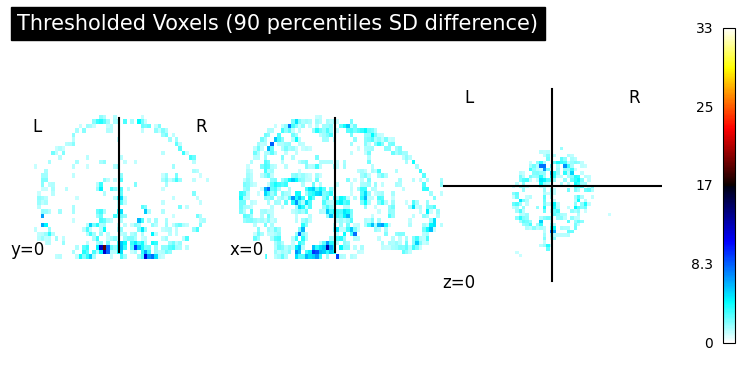

In [73]:
from nilearn import plotting, image

percentile_value = np.percentile(sd_diff_flattened, 90)

print(percentile_value)
# Create a new matrix based on the threshold
thresholded_matrix = np.where(sd_diff_matrix >percentile_value, sd_diff_matrix, 0)

# output_file_path = 'thresholded_sd_diff_1.nii'  # You can change this path as needed
thresholded_image = nib.Nifti1Image(thresholded_matrix, affine=affine, header=header)
# nib.save(nii_image, output_file_path)
# print(f"The new NIfTI file with thresholded SD differences has been saved as '{output_file_path}'.")
# # Load the saved NIfTI file
# output_file_path = 'thresholded_sd_diff_1.nii'  # Path to your saved NIfTI file
# thresholded_img = image.load_img(output_file_path)


plotting.plot_stat_map(
    thresholded_image,
    title="Thresholded Voxels (90 percentiles SD difference)",
    display_mode='ortho', 
    threshold=0,           
    cut_coords=(0, 0, 0),  
    colorbar=True,
              bg_img=None      
)

# Show the plot
plotting.show()



Applying Otsu's thresholding

Min value in SD diff:  9.449499052127663e-07
Max value in SD diff:  33.19595033480241
Otsu's threshold value using numpy: 1.7505685885554088


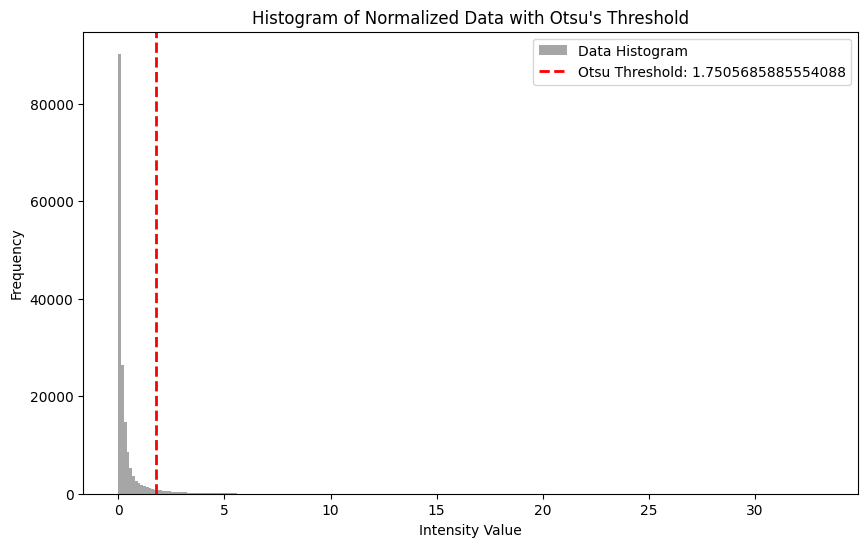

Shape of flattened data: (168960,)
otsu_threshold: 1.7505685885554088


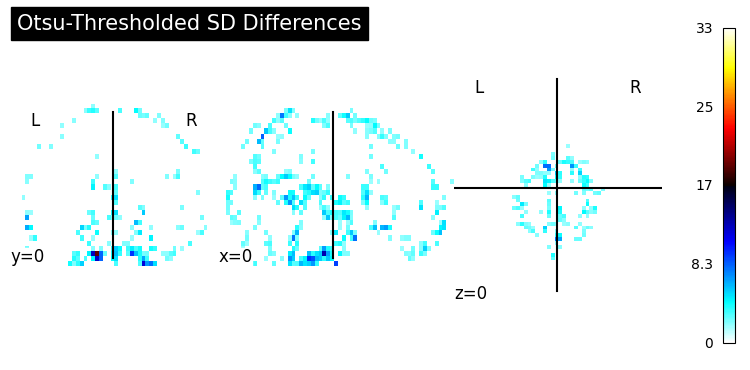

In [75]:
flattened_data = sd_diff_matrix.flatten()
min_val = np.min(flattened_data)
max_val = np.max(flattened_data)
print("Min value in SD diff: ", min_val)
print("Max value in SD diff: ", max_val)


# Histogram computation for the data
hist, bin_edges = np.histogram(flattened_data, bins=256, range=(flattened_data.min(), flattened_data.max()))

# Compute cumulative sums and cumulative means
bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2  # Mid-points of bins
weight1 = np.cumsum(hist)
weight2 = np.cumsum(hist[::-1])[::-1]
mean1 = np.cumsum(hist * bin_mids) / weight1
mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]

# Intra-class variance
variance12 = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2

# Find the threshold that minimizes intra-class variance
index_of_max_variance = np.argmax(variance12)
otsu_threshold = bin_mids[:-1][index_of_max_variance]

print(f"Otsu's threshold value using numpy: {otsu_threshold}")
# Apply the threshold
thresholded_flattened = np.where(flattened_data >otsu_threshold, flattened_data, 0)

thresholded_sd_diff = thresholded_flattened.reshape(sd_diff_matrix.shape)

# (Optional) Create a NIfTI image for visualization if desired
thresholded_img = nib.Nifti1Image(thresholded_sd_diff, affine=img.affine)


# Plot the histogram and indicate the Otsu threshold
plt.figure(figsize=(10, 6))
plt.hist(flattened_data, bins=256, range=(flattened_data.min(), flattened_data.max()), color='gray', alpha=0.7, label='Data Histogram')
plt.axvline(otsu_threshold, color='red', linestyle='dashed', linewidth=2, label=f'Otsu Threshold: {otsu_threshold}')
plt.title('Histogram of Normalized Data with Otsu\'s Threshold')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()
print(f"Shape of flattened data: {flattened_data.shape}")
print(f"otsu_threshold: {otsu_threshold}")  # Should be a scalar

# Visualize the thresholded data using nilearn
plotting.plot_stat_map(
    thresholded_img,
    title="Otsu-Thresholded SD Differences",
    display_mode='ortho',
    threshold=0,
    cut_coords=(0, 0, 0),
    colorbar=True,
    bg_img=None
)
plotting.show()


Binarizing the matrix


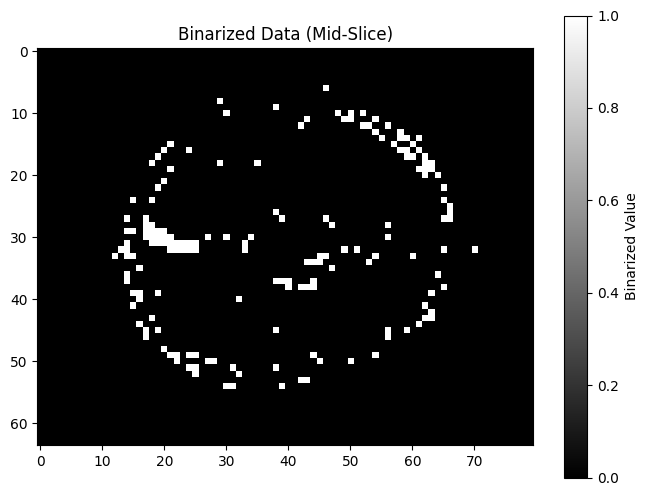

Number of clusters found: 1333


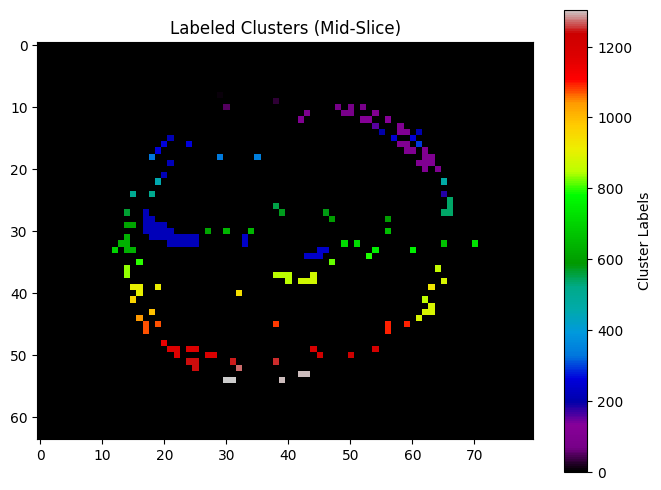

In [76]:
from scipy.ndimage import label

# Binarize the matrix
binarized_data = (thresholded_sd_diff > 0).astype(int)

# Visualize a slice of the binarized data (optional)
plt.figure(figsize=(8, 6))
plt.imshow(binarized_data[:, :, binarized_data.shape[2] // 2], cmap='gray')
plt.title('Binarized Data (Mid-Slice)')
plt.colorbar(label='Binarized Value')
plt.show()


# Label connected components in the binarized data
labeled_array, num_features = label(binarized_data)

# Display the number of clusters found
print(f"Number of clusters found: {num_features}")

# Visualize a specific slice with labeled clusters
plt.figure(figsize=(8, 6))
plt.imshow(labeled_array[:, :, labeled_array.shape[2] // 2], cmap='nipy_spectral')
plt.title('Labeled Clusters (Mid-Slice)')
plt.colorbar(label='Cluster Labels')
plt.show()

Number of clusters found using CCA: 1333
Connected Component Analysis result saved as 'cca_labeled_clusters.nii.gz'.
K-Means clustering result saved as 'kmeans_clustered_image.nii.gz'.


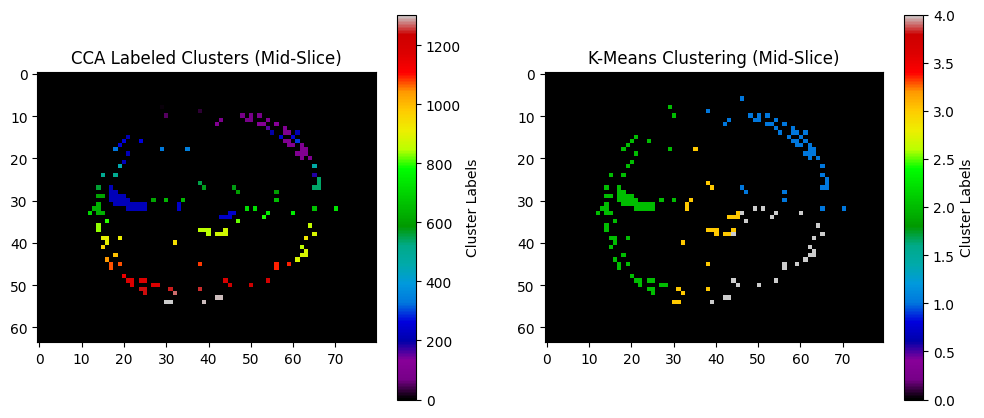

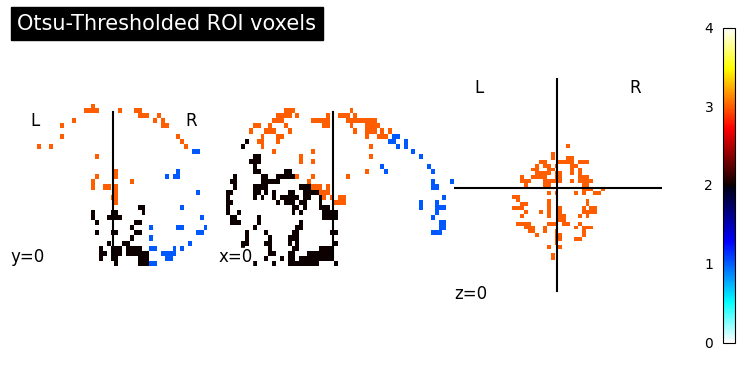

In [81]:
import numpy as np
from scipy.ndimage import label
from sklearn.cluster import KMeans
import nibabel as nib
import matplotlib.pyplot as plt

# Connected Component Analysis (CCA)
# Label connected components in the thresholded data
labeled_array, num_features = label(thresholded_sd_diff > 0) 
print(f"Number of clusters found using CCA: {num_features}")

# Save the labeled CCA result as a NIfTI file
cca_img = nib.Nifti1Image(labeled_array.astype(np.int32), affine=img.affine)
nib.save(cca_img, 'cca_labeled_clusters.nii.gz')
print("Connected Component Analysis result saved as 'cca_labeled_clusters.nii.gz'.")

# K-Means Clustering
# Flatten the data and keep non-zero values for clustering
non_zero_mask = thresholded_sd_diff > 0
data_points = np.argwhere(non_zero_mask)  # Extract coordinates of non-zero points
intensities = thresholded_sd_diff[non_zero_mask].reshape(-1, 1)

# Combine coordinates and intensities for clustering (optional)
features = np.hstack((data_points, intensities))

# Apply k-means clustering
num_clusters = 4
 
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(features)
labels = kmeans.labels_

# Map the k-means labels back to the original shape
kmeans_clustered_image = np.zeros_like(thresholded_sd_diff, dtype=np.int32)
kmeans_clustered_image[non_zero_mask] = labels + 1  # Add 1 to avoid using 0 as a label

# Save the K-means result as a NIfTI file
kmeans_img = nib.Nifti1Image(kmeans_clustered_image, affine=img.affine)
nib.save(kmeans_img, 'kmeans_clustered_image.nii.gz')
print("K-Means clustering result saved as 'kmeans_clustered_image.nii.gz'.")

# Visualize one slice of each result (optional)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("CCA Labeled Clusters (Mid-Slice)")
plt.imshow(labeled_array[:, :, labeled_array.shape[2] // 2], cmap='nipy_spectral')
plt.colorbar(label='Cluster Labels')

plt.subplot(1, 2, 2)
plt.title("K-Means Clustering (Mid-Slice)")
plt.imshow(kmeans_clustered_image[:, :, kmeans_clustered_image.shape[2] // 2], cmap='nipy_spectral')
plt.colorbar(label='Cluster Labels')

plt.show()

plotting.plot_stat_map(
    kmeans_img,
    title="Otsu-Thresholded ROI voxels",
    display_mode='ortho',
   threshold=0,         
    cut_coords=(0, 0, 0), 
    colorbar=True,
              bg_img=None   
)
plotting.show()

